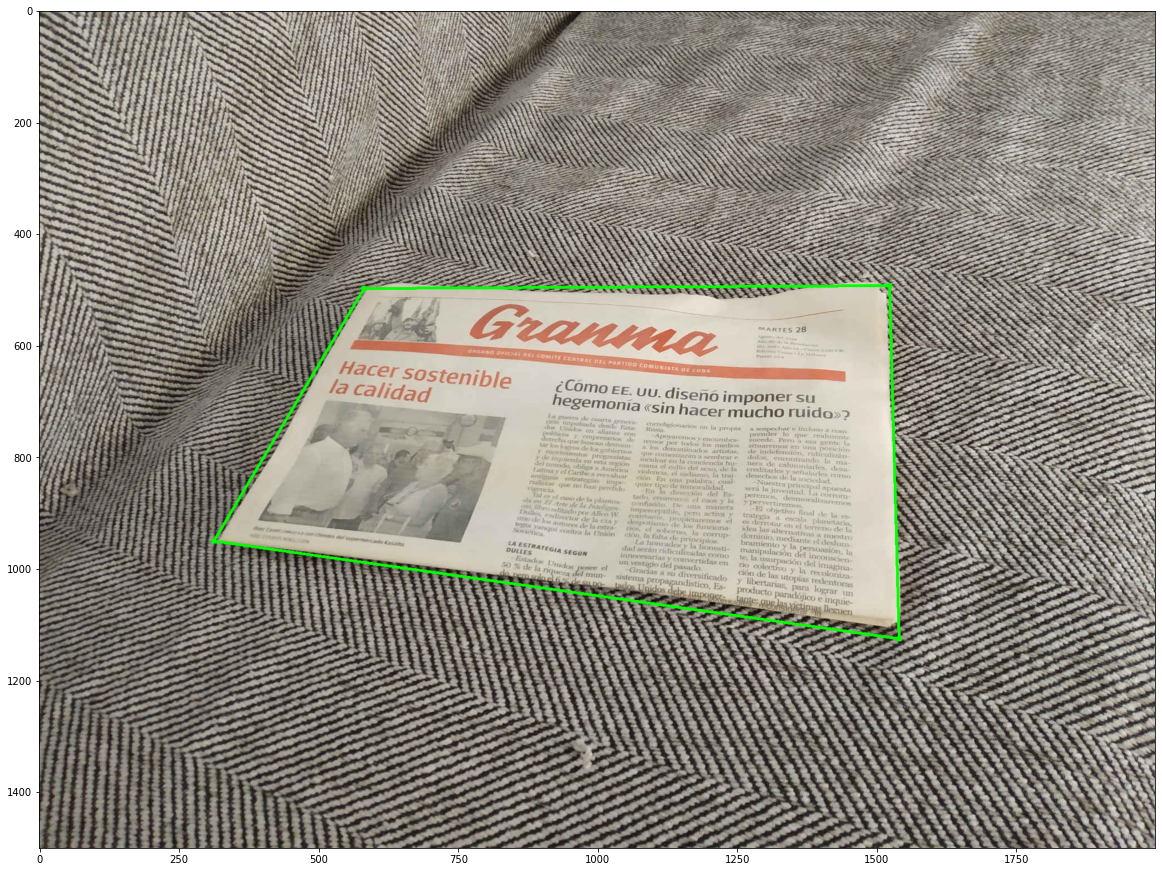

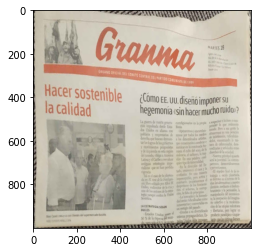

In [ ]:
import cv2
import sys 
import numpy as np
from PIL import Image
from numpy.linalg import inv
import matplotlib.pyplot as plt

def set_up_linear_system():
    #creating the A array(works for any amount of points)
    A = [[0 for x in range(8)] for y in range(8)] #se A to zeros
    for i in range(0,8,2):
        A[i][0] = points[int(i/2)][0]
        A[i][1] = points[int(i/2)][1]
        A[i][2] = 1
        A[i][6] = -points[int(i/2)][0] * points_new[int(i/2)][0]
        A[i][7] = -points[int(i/2)][1] * points_new[int(i/2)][0]
    for i in range(1,8,2):
        A[i][3] = points[int((i-1)/2)][0]
        A[i][4] = points[int((i-1)/2)][1]
        A[i][5] = 1
        A[i][6] = -points[int((i-1)/2)][0] * points_new[int(i/2)][1]
        A[i][7] = -points[int((i-1)/2)][1] * points_new[int(i/2)][1]
    #calculating the inverse of A array in order to solve the equation
    A_inverse = inv(A)
    #b will be an array vector that will host the new points
    b = []
    for i in range(len(points_new)):
        for j in range(2):
            b.append(points_new[i][j])
    x = A_inverse @ b
    transformation_matrix = [] 
    #transfer the elements of x in the transformation_matrix = [] 
    i = 0
    pointer = -1
    for element in x:
        #every 3 elements change row because the transformation_matrix should be 3x3
        if i%3 == 0:
            transformation_matrix.append([])
            pointer += 1
            i = 0
        transformation_matrix[pointer].append(element)
        i += 1
    transformation_matrix[pointer].append(1)
    transformed_image = cv2.warpPerspective(image, np.array(transformation_matrix), (1000, 1000))
    #transformed_image = cv2.resize(np.array(transformed_image), (1000, 1000))
    #transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)
    #cv2.imshow("Transformed Image", transformed_image)
    fig = plt.figure(figsize=(20,20))
    plt.imshow(image_for_selecting)
    plt.show()
    plt.imshow(transformed_image)
    plt.show()

def fix_input_points():
    global points
    #configure points so no matter how the user selects them 
    #they will always be saved in the same order
    #sort points by x
    points.sort(key = lambda element: element[0]) 
    #the first two should belong to the upper part because they have the lowest x value
    upper = [points[0], points[1]]
    #sort upper points by y to get the right order
    upper.sort(key = lambda element: element[1]) 
    #lower part should consist of the remaining points 
    lower = [points[2], points[3]]
    #again sort lower points by y to get the right order
    lower.sort(key = lambda element: element[1])
    #merge them all toghether and you get the points that user selected in a specific order
    points = [upper[0], upper[1], lower[0], lower[1]]
    
def mouse_click(event, x, y, flags, arguments):
    global mouse_mode
    #check if user clicked and if he already chose 4 points so nothing happens again
    if event == cv2.EVENT_LBUTTONDOWN and len(points) < 4:
        points.append([x, y])
        #mark the point that user clicked
        cv2.circle(dialog_image, (x, y) ,5 , (0 , 255, 0), cv2.FILLED)
        cv2.circle(image_for_selecting, (x, y) ,5 , (0 , 255, 0), cv2.FILLED)
        #refresh the image to show the marked point
        cv2.imshow("Original Image", dialog_image)
    #once we all the points are colected fix points and execute the slicing 
    if (len(points) == 4) and (mouse_mode == 1):
        #mouse_mode is a flag variable to ensure we do this only once
        mouse_mode = 0
        #draw lines for each pair of points
        cv2.line(image_for_selecting, tuple(points[0]), tuple(points[1]), (0 , 255, 0), 4) 
        cv2.line(image_for_selecting, tuple(points[0]), tuple(points[2]), (0 , 255, 0), 4) 
        cv2.line(image_for_selecting, tuple(points[2]), tuple(points[3]), (0 , 255, 0), 4) 
        cv2.line(image_for_selecting, tuple(points[3]), tuple(points[1]), (0 , 255, 0), 4)
        #update image of pop-up window
        final_image = cv2.cvtColor(image_for_selecting, cv2.COLOR_BGR2RGB)
        cv2.imshow("Original Image", final_image)
        #order points
        fix_input_points()
        #calculate th
        set_up_linear_system()

#array that holds the points given by user
points = []
#array that holds the new positions of the points 
points_new = []
mouse_mode = 1
#setting the points to be at the corners of anew 1000x1000 image
points_new.append([0, 0])
points_new.append([0 ,999])
points_new.append([999, 0])
points_new.append([999 ,999])

#Import image from disk  
image = np.array(Image.open("granma.jpg"))
#import a second copy to mark the selected points
image_for_selecting = np.array(Image.open("granma.jpg"))
dialog_image = cv2.imread("granma.jpg")
height = image.shape[0]
width = image.shape[1]
cv2.namedWindow("Original Image", cv2.WINDOW_NORMAL)
cv2.imshow("Original Image", dialog_image)
cv2.setMouseCallback("Original Image", mouse_click)
cv2.waitKey(0)
